[PCA （主成分分析）详解 （写给初学者）](https://blog.csdn.net/a8039974/article/details/81285238)  
[主成分分析（PCA）原理详解](https://blog.csdn.net/program_developer/article/details/80632779)

协方差矩阵：  
$$C = \begin{pmatrix}
    cov(x,x) &cov(x,y)  & cov(x,z) \\
   cov(y,x)  & cov(y,y) &  cov(y,z) \\
   cov(z,x)  & cov(z,y) &cov(z,z)   \\
\end{pmatrix}\qquad$$  
从协方差矩阵上，可以得到变量之间两两的相关性

In [1]:
import numpy as np
#设置一下np的输出格式
np.set_printoptions(threshold=100,precision= 4,suppress=True)


In [3]:
# 计算以下数据的协方差矩阵
import numpy as np
np.random.seed(0)
data = np.random.uniform(1,10,(10,2))
data



array([[5.93932154, 4.88413414],
       [6.42487038, 4.40906945],
       [4.81289319, 2.25236405],
       [4.9382849 , 3.59125916],
       [9.67296484, 3.30958013],
       [8.12552534, 4.62244676],
       [6.11240105, 1.62961367],
       [1.63932452, 2.59833793],
       [1.18196558, 0.67837608],
       [8.00341076, 3.66035314]])

必须去中心化

In [10]:
data_norm = data-data.mean(axis = 0)
data_norm

array([[ 0.25422532,  1.72058069],
       [ 0.73977417,  1.245516  ],
       [-0.87220302, -0.9111894 ],
       [-0.74681131,  0.42770571],
       [ 3.98786863,  0.14602668],
       [ 2.44042913,  1.45889331],
       [ 0.42730484, -1.53393977],
       [-4.04577169, -0.56521552],
       [-4.50313063, -2.48517737],
       [ 2.31831455,  0.49679969]])

In [11]:
X = data_norm[:,0]
Y = data_norm[:,1]
X,Y

(array([ 0.25422532,  0.73977417, -0.87220302, -0.74681131,  3.98786863,
         2.44042913,  0.42730484, -4.04577169, -4.50313063,  2.31831455]),
 array([ 1.72058069,  1.245516  , -0.9111894 ,  0.42770571,  0.14602668,
         1.45889331, -1.53393977, -0.56521552, -2.48517737,  0.49679969]))

In [12]:
# 定义一个函数，输入X，Y能得到X，Y之间的协方差
def getcov(X,Y):

    covxy = ((X-X.mean())*(Y-Y.mean())).sum()/(len(X)-1)

    return covxy

In [13]:
getcov(X,X)

7.332530886964573

numpy自带了协方差矩阵的计算方法，验证一下

In [14]:
C = np.cov(data_norm.T)
C

array([[7.33253089, 2.21676586],
       [2.21676586, 1.86332846]])

# 计算协方差矩阵的特征向量和特征值

In [15]:
#计算特征值和特征向量
vals, vecs = np.linalg.eig(C)
#重新排序，从大到小
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]


In [16]:
#第一个特征值对应的特征向量
vals[0],vecs[:,0]

(8.118170385604765, array([0.94255563, 0.33404923]))

In [17]:
#第二个特征值对应的特征向量
vals[1],vecs[:,1]

(1.0776889576956008, array([-0.33404923,  0.94255563]))

这时候，相当于已经在数据中定义了两个轴，第一个轴的方向是第一个特征向量$v_1$，第二个轴的方向是第二个特征向量$v_2$


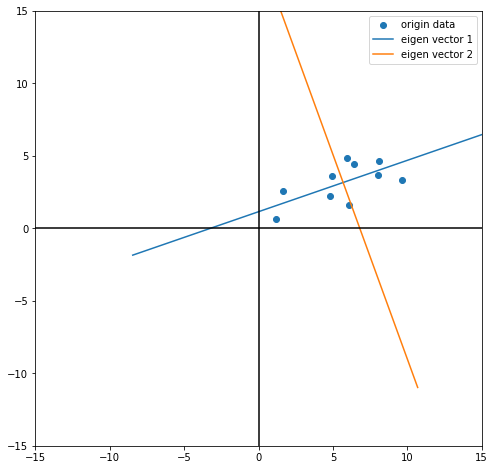

In [18]:
import matplotlib.pyplot as plt
#设置图大小
size = 15

plt.figure(1,(8,8))

plt.scatter(data[:,0],data[:,1],label='origin data')

i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#plt.plot(vecs[:,1]*-10,vecs[:,1]*10)

#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

如果用PCA把$m$个维度的数据降维成$k$个维度，即只用前$k$个主成分来表示

In [19]:
#数据在主成分1上的投影坐标是Y
k=1
Q = vecs[:,:k]
Y = np.matmul(data_norm,Q)
Y

array([[ 0.81438017],
       [ 1.11334197],
       [-1.12648198],
       [-0.56103644],
       [ 3.80756812],
       [ 2.7875824 ],
       [-0.10965282],
       [-4.00217468],
       [-5.07462271],
       [ 2.35109598]])

In [20]:
#得到去中心化的还原数据
np.matmul(Y,Q.T)

array([[ 0.76759861,  0.27204307],
       [ 1.04938674,  0.37191103],
       [-1.06177193, -0.37630044],
       [-0.52880805, -0.18741379],
       [ 3.58884476,  1.2719152 ],
       [ 2.62745148,  0.93118976],
       [-0.10335388, -0.03662944],
       [-3.77227227, -1.33692337],
       [-4.7831142 , -1.69517381],
       [ 2.21603875,  0.7853818 ]])

In [21]:
#加上均值，还原数据
data_ = np.matmul(Y,Q.T)+data.mean(0)
data_

array([[6.45269482, 3.43559652],
       [6.73448295, 3.53546448],
       [4.62332428, 2.78725301],
       [5.15628816, 2.97613966],
       [9.27394097, 4.43546865],
       [8.31254769, 4.09474321],
       [5.58174233, 3.12692401],
       [1.91282394, 1.82663007],
       [0.90198202, 1.46837963],
       [7.90113496, 3.94893525]])

# 降维重构的数据与原数据对比

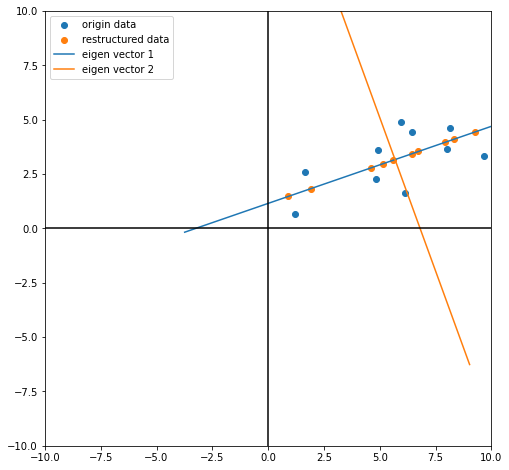

In [25]:

import matplotlib.pyplot as plt
#设置图大小
size = 10

plt.figure(1,(8,8))

plt.scatter(data[:,0],data[:,1],label='origin data')

plt.scatter(data_[:,0],data_[:,1],label='restructured data')

i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#plt.plot(vecs[:,1]*-10,vecs[:,1]*10)

#画一下x轴y轴
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()